# Identify creative dishes: Sushi Sanwiches  (all code version) <a class="tocSkip">
    
**Deep Learning assignment with public available data** 


Ángel Martínez-Tenor 
    
September 2018 (Last Updated in May 2021) 

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Description" data-toc-modified-id="Description-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Description</a></span><ul class="toc-item"><li><span><a href="#Setup" data-toc-modified-id="Setup-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Setup</a></span></li><li><span><a href="#Load-the-Data" data-toc-modified-id="Load-the-Data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Load the Data</a></span></li><li><span><a href="#Explore-and-Process-the-Data" data-toc-modified-id="Explore-and-Process-the-Data-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Explore and Process the Data</a></span><ul class="toc-item"><li><span><a href="#Visualize-the-data" data-toc-modified-id="Visualize-the-data-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Visualize the data</a></span></li><li><span><a href="#Split-the-data-into-training-and-validation-sets-(not-enough-data-for-3-partitions)" data-toc-modified-id="Split-the-data-into-training-and-validation-sets-(not-enough-data-for-3-partitions)-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Split the data into training and validation sets (not enough data for 3 partitions)</a></span></li><li><span><a href="#Create-image-generators-with-data-augmentation" data-toc-modified-id="Create-image-generators-with-data-augmentation-1.3.3"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>Create image generators with data augmentation</a></span></li></ul></li><li><span><a href="#Build-and-train-the-Neural-Network-model" data-toc-modified-id="Build-and-train-the-Neural-Network-model-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Build and train the Neural Network model</a></span><ul class="toc-item"><li><span><a href="#Load-a-well-known-model-pretrained-on-Imagenet-dataset-(only-convolutional-layers)" data-toc-modified-id="Load-a-well-known-model-pretrained-on-Imagenet-dataset-(only-convolutional-layers)-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Load a well-known model pretrained on Imagenet dataset (only convolutional layers)</a></span></li><li><span><a href="#Get-bottleneck-features" data-toc-modified-id="Get-bottleneck-features-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Get bottleneck features</a></span></li><li><span><a href="#Biuld-a-final-fully-connected-classifier" data-toc-modified-id="Biuld-a-final-fully-connected-classifier-1.4.3"><span class="toc-item-num">1.4.3&nbsp;&nbsp;</span>Biuld a final fully connected classifier</a></span></li><li><span><a href="#Train-the-Classifier-with-the-bottleneck-features" data-toc-modified-id="Train-the-Classifier-with-the-bottleneck-features-1.4.4"><span class="toc-item-num">1.4.4&nbsp;&nbsp;</span>Train the Classifier with the bottleneck features</a></span></li></ul></li><li><span><a href="#Build-the-full-model-(pretrained-bottleneck-+-custom-classifier)" data-toc-modified-id="Build-the-full-model-(pretrained-bottleneck-+-custom-classifier)-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Build the full model (pretrained bottleneck + custom classifier)</a></span></li><li><span><a href="#Make-Predictions-and-get-Results" data-toc-modified-id="Make-Predictions-and-get-Results-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Make Predictions and get Results</a></span></li><li><span><a href="#Analysis-of-results-and-&amp;-Future-work" data-toc-modified-id="Analysis-of-results-and-&amp;-Future-work-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Analysis of results and &amp; Future work</a></span></li></ul></li></ul></div>

# Description

<b>Goal:</b> Identify samples that could potentially be considered as a combination of two dishes given their pictures

<b> Input: </b> Two separated folders with pictures of each class. The example provided here uses a dataset with 402 pictures of sandwiches and 402 pictures of sushi. [Link](http://research.us-east-1.s3.amazonaws.com/public/sushi_or_sandwich_photos.zip)

Only the best model obtained is shown here: MobileNet with input size (224,224) pretrained with Imagenet with a small fully connected classified trained and tuned with this data.

This implementation is largely influenced and reuses code from the following sources:

- [Francois Chollet: 'Building powerful image classification models using very little data'](https://blog.tensorflow.keras.io/building-powerful-image-classification-models-using-very-little-data.html)  (main guide)

- [Bharat Kunwar: 'Sushi or Sandwich classifier'](https://github.com/brtknr/SushiSandwichClassifier/blob/master/sushi-or-sandwich-tensorflow.keras.ipynb) (base classifier)

- [Angel Martínez-Tenor: 'Data science projects with Keras'](https://github.com/angelmtenor/data-science-keras) (setup, structure, and helper functions)

## Setup

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import helper_ml  # custom library for this assigment

helper_ml.info_gpu()
sns.set_palette("Reds")
helper_ml.reproducible(seed=0)  # setup reproducible results from run to run using Keras

%matplotlib inline

-- No GPU  --
Keras		v2.5.0
TensorFlow	v2.5.0


## Load the Data

In [2]:
import zipfile

cloud_path = 'http://research.us-east-1.s3.amazonaws.com/public/sushi_or_sandwich_photos.zip'
data_file = 'sushi_or_sandwich_photos.zip'
data_dir = "sushi_or_sandwich"

# Download the pictures
if not os.path.isfile(data_file):
    print('Downloading data ...')
    os.system('wget ' + cloud_path)
    print('Downloading data ... OK\n')

# Extract the pictures
if not os.path.isdir(data_dir):
    print('Extracting data ...')
    zip_ref = zipfile.ZipFile(data_file, 'r')
    zip_ref.extractall('./')
    zip_ref.close()
    print('Extracting data ... OK\n')

## Explore and Process the Data

### Visualize the data

pictures:
sandwich   	402
sushi   	402


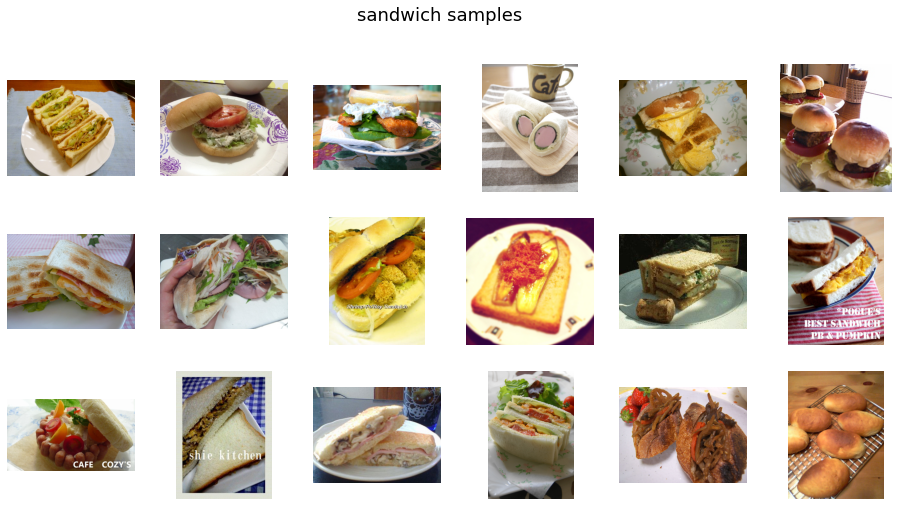

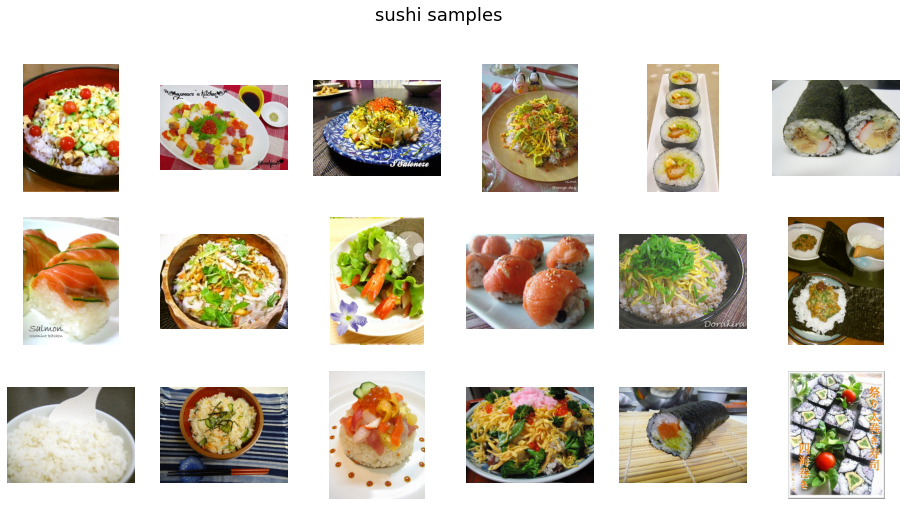

In [3]:
from PIL import Image
from pylab import gcf


def load_samples(path, size):
    """ load and return an array of images """
    imagesList = os.listdir(path)
    samples = []
    for image in imagesList[:size]:
        img = Image.open(os.path.join(path, image))
        samples.append(img)
    return samples


for c in ('sandwich', 'sushi'):
    path = os.path.join(data_dir, c)
    imgs = load_samples(path, 18)

    plt.figure(figsize=(16, 8))
    gcf().suptitle(c + " samples", fontsize=18)

    for i, img in enumerate(imgs):
        # you can show every image
        plt.subplot(3, 6, i + 1)
        plt.imshow(img)
        plt.axis('off')

# Print the number of pictures
print("pictures:")
for c in ('sandwich', 'sushi'):
    path = os.path.join(data_dir, c)
    print("{}   \t{}".format(
        c, len([name for name in os.listdir(path) if os.path.isfile(os.path.join(path, name))])))

###  Split the data into training and validation sets (not enough data for 3 partitions)

In [4]:
import shutil
import glob

val_size = 0.3 # size the of validation set
train_dir = "train"
val_dir = "validation"

# remove existing sets
for d in (train_dir, val_dir):
    if os.path.isdir(d):
        shutil.rmtree(d)
        print('old ' + d + ' directory deleted')
    # create empty directories
    for c in ('sandwich', 'sushi'):
        os.makedirs(os.path.join(d, c))
    print('empty ' + d + ' directory created')

# Create training and validation sets
for c in ('sandwich', 'sushi'):
    files = glob.glob('{}/{}/*.jpg'.format(data_dir, c))
    indices = np.random.permutation(len(files))
    train_val_split = int(len(files) * (val_size))
    for i, ix in enumerate(indices):
        src = files[ix]
        dest = '{}/{}/{}'.format(val_dir if i < train_val_split else train_dir, c,
                                 files[ix].split('/')[-1])
        shutil.copyfile(src, dest)

# Print the number of pictures in each set
print("\npictures:")
for d in (train_dir, val_dir):
    for c in ('sandwich', 'sushi'):
        path = os.path.join(d, c)
        print("{} {}  {}".format(
            d, c, len([n for n in os.listdir(path) if os.path.isfile(os.path.join(path, n))])))

old train directory deleted
empty train directory created
old validation directory deleted
empty validation directory created

pictures:
train sandwich  282
train sushi  282
validation sandwich  120
validation sushi  120


### Create image generators with data augmentation

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_width, img_height = 224, 224
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.4,  # high change of persperctive in this pictures
    zoom_range=0.2,
    horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1 / 255)

## Build and train the Neural Network model

### Load a well-known model pretrained on Imagenet dataset (only convolutional layers)

In [7]:
from tensorflow.keras.applications import MobileNet

model_bottleneck = MobileNet(
    weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

for layer in model_bottleneck.layers:
    layer.trainable = False

### Get bottleneck features

In [8]:
print('Image generation:')
train_bottleneck_generator = train_datagen.flow_from_directory(
    train_dir,
    color_mode='rgb',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode=None,
    shuffle=False,
)

val_bottleneck_generator = val_datagen.flow_from_directory(
    val_dir,
    color_mode='rgb',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode=None,
    shuffle=False,
)

train_bottleneck = model_bottleneck.predict(train_bottleneck_generator, verbose=1)
val_bottleneck = model_bottleneck.predict(val_bottleneck_generator, verbose=1)
train_labels = train_bottleneck_generator.classes
val_labels = val_bottleneck_generator.classes

Image generation:
Found 564 images belonging to 2 classes.
Found 240 images belonging to 2 classes.
8/8 [==============================] - 4s 465ms/step


### Biuld a final fully connected classifier

In [10]:
model = None

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dropout, Flatten, Dense, MaxPooling2D, Conv2D, InputLayer, Activation
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.initializers import TruncatedNormal
from tensorflow.keras.optimizers import Adamax


def build_top_nn(summary=False):

    w = TruncatedNormal(mean=0.0, stddev=0.0001, seed=None)
    opt = Adamax(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)

    model_top = Sequential()
    model_top.add(Flatten(input_shape=train_bottleneck.shape[1:]))
    model_top.add(Dense(16, kernel_initializer=w, bias_initializer='zeros'))
    model_top.add(Activation('relu'))
    model_top.add(Dropout(0.5))
    model_top.add(Dense(1, kernel_initializer=w, bias_initializer='zeros'))
    model_top.add(Activation('sigmoid'))

    if summary:
        model_top.summary()

    model_top.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

    return model_top


model_top = build_top_nn(summary=True)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 50176)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                802832    
_________________________________________________________________
activation_2 (Activation)    (None, 16)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
_________________________________________________________________
activation_3 (Activation)    (None, 1)                 0         
Total params: 802,849
Trainable params: 802,849
Non-trainable params: 0
________________________________________________

### Train the Classifier with the bottleneck features

Training ....
time: 	 18.6 s


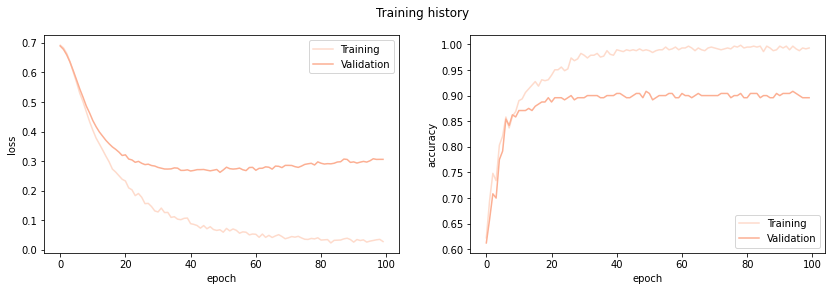


Training loss:  	0.0277
Validation loss: 	0.3058

Training accuracy: 	0.993
Validation accuracy:	0.896

Best model. Validation accuracy: 	 0.908


In [12]:
from time import time
from tensorflow.keras.models import load_model

# tuned hyperparameters
# batch_size = batch size for generators (above)
patience = 50
nb_epoch = 500


def train_nn(model, show=True):

    checkpoint = ModelCheckpoint(
        "checkpoint-top.h5",
        monitor='val_accuracy',
        verbose=0,
        save_best_only=True,
        save_weights_only=False,
        mode='auto')

    early = EarlyStopping(
        monitor='val_accuracy', min_delta=0, patience=patience, verbose=0, mode='auto')

    if show:
        print('Training ....')
        t0 = time()

    history = model.fit(
        train_bottleneck,
        train_labels,
        epochs=nb_epoch,
        batch_size=batch_size,
        verbose=0,
        validation_data=(val_bottleneck, val_labels),
        callbacks=[checkpoint, early])

    if show:
        print("time: \t {:.1f} s".format(time() - t0))
        helper_ml.show_training(history)
        
    return history


model_top = None
model_top = build_top_nn(summary=False)
history = train_nn(model_top)

# restore best model found (callback-checkpoint)
model_top = None
model_top = load_model("checkpoint-top.h5")

acc = model_top.evaluate(val_bottleneck, val_labels, verbose=0)[1]
print('\nBest model. Validation accuracy: \t {:.3f}'.format(acc))

## Build the full model (pretrained bottleneck + custom classifier)


In [13]:
# Stack Layers using Keras's fucntional approach:
full_model = Model(inputs=model_bottleneck.input, outputs=model_top(model_bottleneck.output))
full_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## Make Predictions and get Results

Potential Dishes = pictures misclassified or with output (sigmoid) $\in$ (0.45, 0.55). Only the validation set is used here to avoid trained samples

Found 240 images belonging to 2 classes.
Potential Sushi Sanwiches found:
25 files saved in '/output'


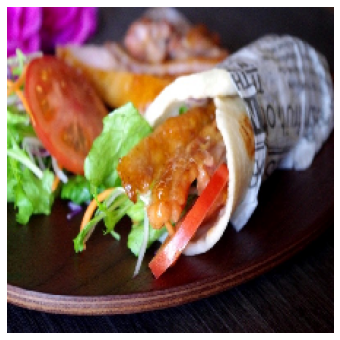

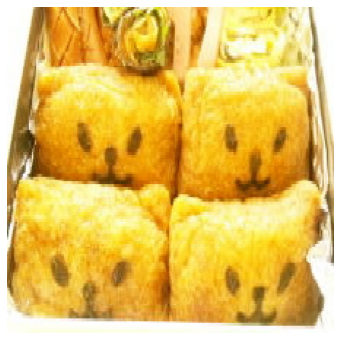

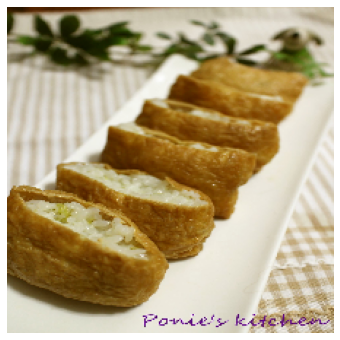

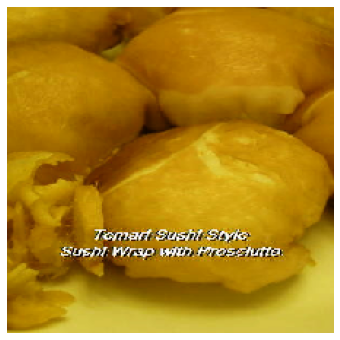

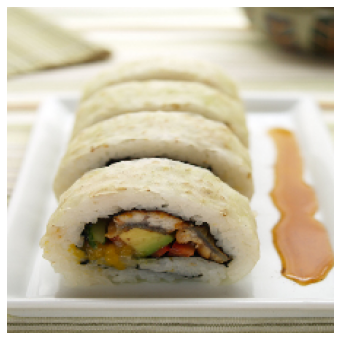

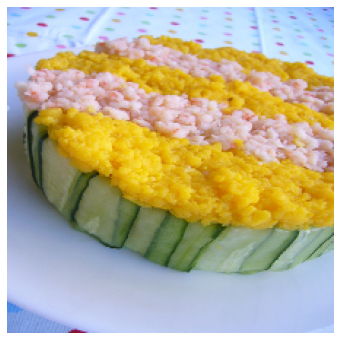

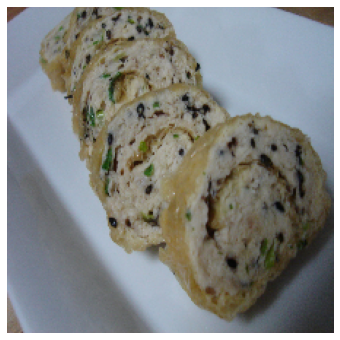

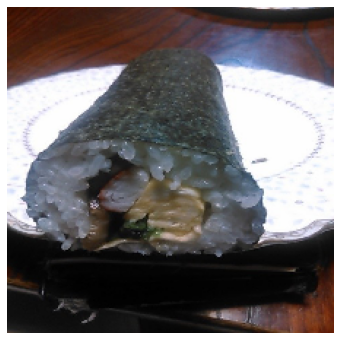

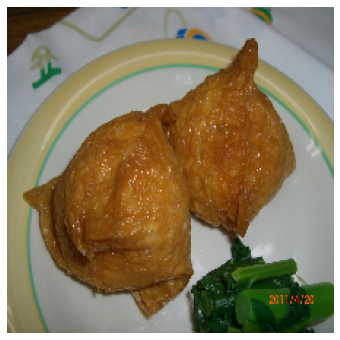

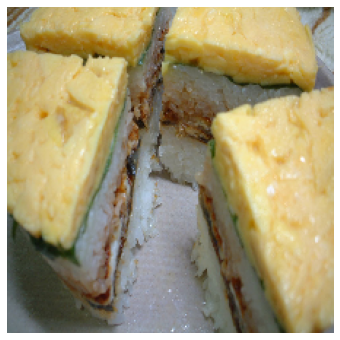

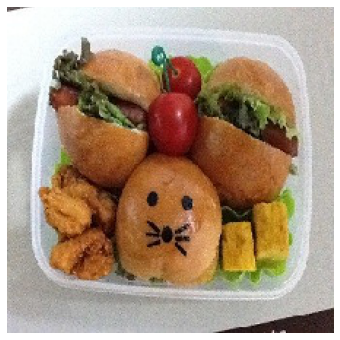

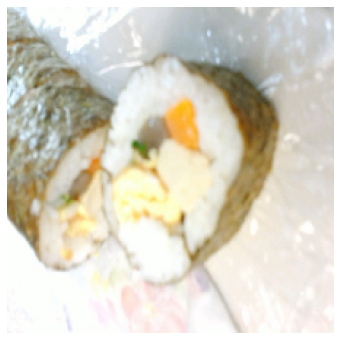

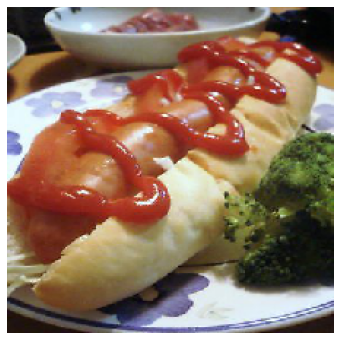

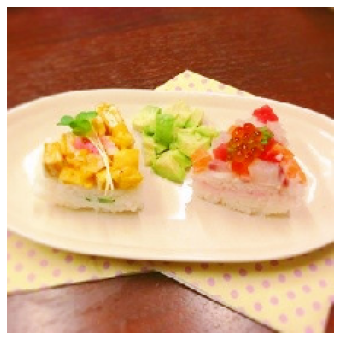

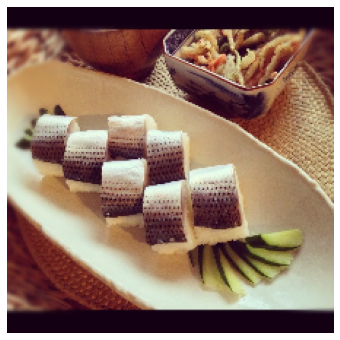

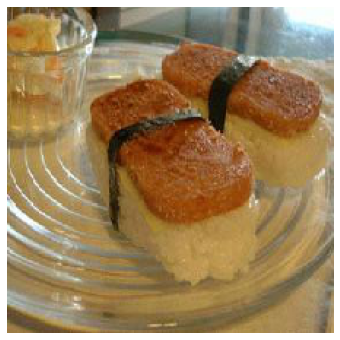

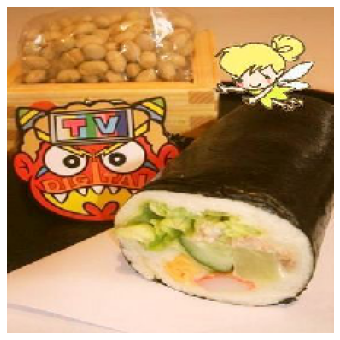

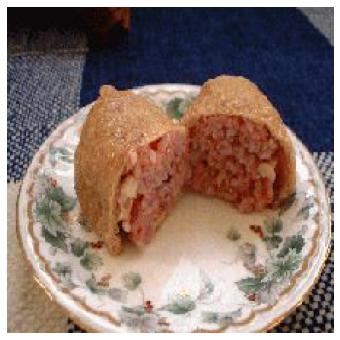

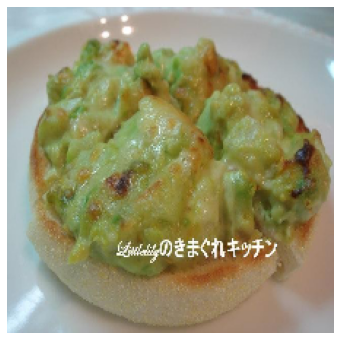

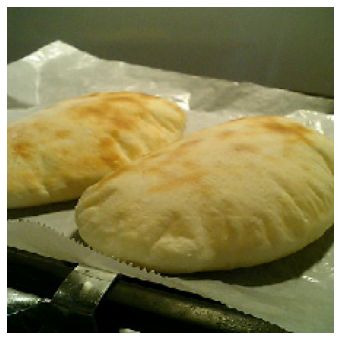

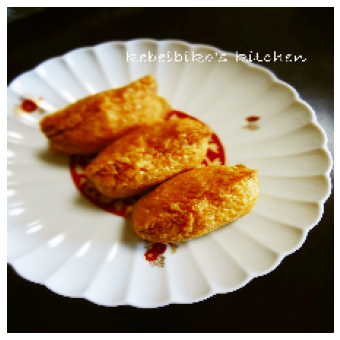

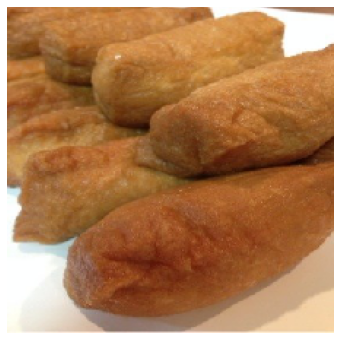

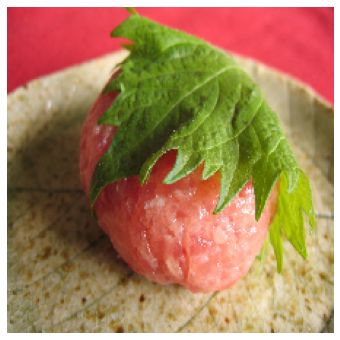

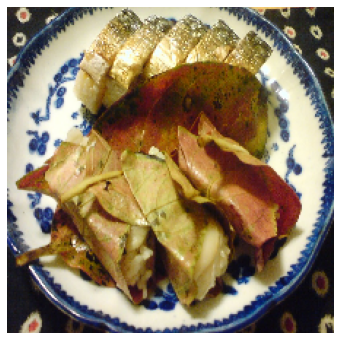

In [14]:
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="binary",
)

plt.rcParams.update({'figure.max_open_warning': 0})

output_dir = "output"

if os.path.isdir(output_dir):
    shutil.rmtree(output_dir)

os.makedirs(output_dir)

print("Potential Sushi Sanwiches found:")

n = 0
for i in range(len(val_generator)):
    images, labels = val_generator[i]
    predictions = full_model.predict(images)

    for im, l, p in zip(images, labels, predictions.flatten()):
        #if (p > 0.45 and p < 0.55):
        if (p > 0.45 and p < 0.55) or (l < 0.5 and p > 0.5) or (l > 0.5 and p < 0.5):
            n = n + 1
            plt.figure(figsize=(6, 6))
            plt.imshow(im)
            plt.axis('off')
            plt.savefig("{}/{}.jpg".format(output_dir, n))
print("{} files saved in '/{}'".format(n, output_dir))
plt.close()

## Analysis of results and & Future work

The best model obtained, based on transfer learning with a pretrained MobileNet, achieved accuracies between 89-92% on the validation set. Less than 80% of accuracy was obtained with smaller custom convolutional models without transfer learning.

The generator of the augmented images used to train the classifier is based on the fact that the dishes are usually centered and photographed from different angles.

The identified potential dishes contain both actual potential combination and no combination at all. New potential dishes can be obtained by changing the 'SEED' parameter in the main script (different validation set).

Better accuracies of the classifier can be obtained by training with a large dataset or by fine-tuning the top layers of the pre-trained MobileNet network. However, it is likely that the identification of potential dishes does not improve. 

Alternate advanced methods could include Style Transfer or using Generative Adversarial Networks for combining data, as [RemixNet](https://ieeexplore.ieee.org/document/7889574).